In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [9]:
# set a default figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

In [4]:
df = pd.read_csv('gurgaon_properties_outliers_treated.csv')
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,floor_num,facing,age_possession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
640,flat,dlf regal gardens,sector 90,1.30,7151.0,1818.0,Super Built up area 1818(168.9 sq.m.)Built Up ...,3.0,3.0,3+,7.0,South,Relatively New,1818.0,1700.0,1400.0,0.0,0.0,0.0,0.0,0.0,0.0,141.0,606.000000
619,flat,sare crescent parc,sector 92,0.95,5013.0,1895.0,Built Up area: 1895 (176.05 sq.m.)Carpet area:...,4.0,5.0,3+,13.0,North,Undefined,NaN,1895.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,473.750000
3288,flat,ireo victory valley,sector 67,2.99,11832.0,2527.0,Super Built up area 2527(234.77 sq.m.)Built Up...,3.0,3.0,3,4.0,East,Relatively New,2527.0,2200.0,2100.0,0.0,1.0,0.0,0.0,0.0,1.0,37.0,842.333333
3005,flat,shree vardhman victoria,sector 70,1.65,8462.0,1950.0,Super Built up area 1950(181.16 sq.m.),3.0,4.0,3,12.0,North,Relatively New,1950.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.0,56.0,650.000000
226,flat,ss almeria,sector 84,1.48,7400.0,2000.0,Super Built up area 2000(185.81 sq.m.)Carpet a...,3.0,3.0,2,1.0,South-West,New Property,2000.0,NaN,1294.0,0.0,1.0,1.0,0.0,0.0,1.0,139.0,666.666667


In [5]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedrooms                  0
bathrooms                 0
balconies                 0
floor_num                17
facing                 1011
age_possession            0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

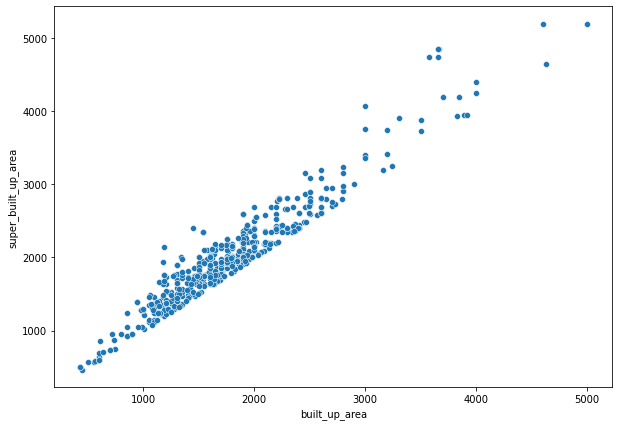

In [10]:
sns.scatterplot(x=df['built_up_area'], y=df['super_built_up_area'])
plt.show()

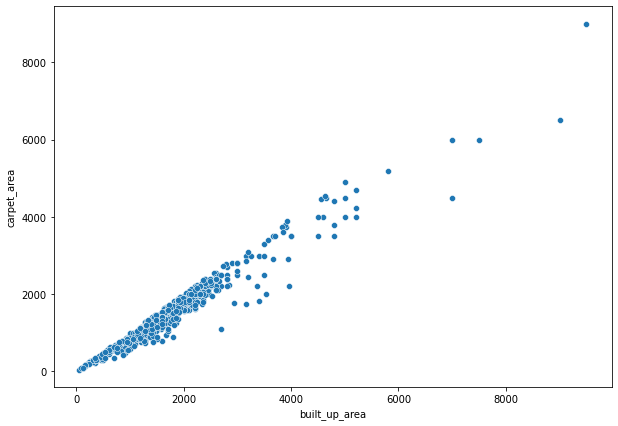

In [11]:
sns.scatterplot(x=df['built_up_area'], y=df['carpet_area'])
plt.show()

In [12]:
((df['super_built_up_area'].isnull() & df['built_up_area'].isnull() & df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3550    False
3551    False
3552    False
3553    False
3554    False
Length: 3555, dtype: bool

In [14]:
all_present_df = df[~((df['super_built_up_area'].isnull() | df['built_up_area'].isnull() | df['carpet_area'].isnull()))]
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [15]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,floor_num,facing,age_possession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,bestech park view city,sector 48,2.65,10323.0,2567.0,Super Built up area 2567(238.48 sq.m.)Carpet a...,4.0,4.0,3+,11.0,North-East,Moderately Old,2567.0,NaN,1750.00,1.0,1.0,0.0,0.0,0.0,1.0,174.0,641.75
15,flat,signature global grand iva,sector 103,0.50,6250.0,800.0,Super Built up area 800(74.32 sq.m.)Carpet are...,2.0,2.0,2,10.0,NaN,Relatively New,800.0,NaN,605.00,0.0,0.0,0.0,0.0,0.0,0.0,8.0,400.00
35,flat,godrej aria,sector 79,1.95,8519.0,2289.0,Super Built up area 2289(212.66 sq.m.)Carpet a...,3.0,4.0,3+,10.0,NaN,New Property,2289.0,NaN,1121.00,0.0,1.0,0.0,0.0,0.0,0.0,32.0,763.00
40,flat,emaar gurgaon greens,sector 102,1.55,9394.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3.0,4.0,3,7.0,North,Relatively New,1650.0,NaN,1022.58,0.0,1.0,0.0,0.0,0.0,1.0,152.0,550.00
46,flat,m3m woodshire,sector 107,0.80,5857.0,1366.0,Super Built up area 1366(126.91 sq.m.)Carpet a...,2.0,2.0,3+,6.0,West,Relatively New,1366.0,NaN,1055.00,0.0,0.0,0.0,1.0,0.0,1.0,174.0,683.00


In [16]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2), inplace=True)

/tmp/ipykernel_9679/3548745466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2), inplace=True)


In [17]:
df.update(sbc_df)
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedrooms                  0
bathrooms                 0
balconies                 0
floor_num                17
facing                 1011
age_possession            0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [18]:
# only carpet area not null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9), inplace=True)

/tmp/ipykernel_9679/3152178468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9), inplace=True)


In [19]:
df.update(c_df)
df['built_up_area'].isnull().sum()

875

In [24]:
# only super built up area not null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105), inplace=True)

/tmp/ipykernel_9679/1010754756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105), inplace=True)


In [25]:
df.update(sb_df)
df['built_up_area'].isnull().sum()

0

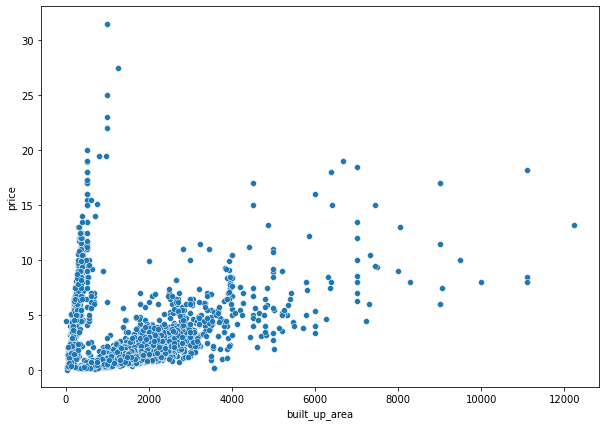

In [28]:
sns.scatterplot(x=df['built_up_area'], y=df['price'])
plt.show()

In [29]:
anomaly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price', 'area', 'built_up_area']]
anomaly_df.sample(5)

,price,area,built_up_area
2782,3.25,1449.0,161.0
2862,3.00,1667.0,1654.0
2051,7.50,2160.0,241.0
3179,7.50,3240.0,360.0
2224,8.00,2700.0,300.0


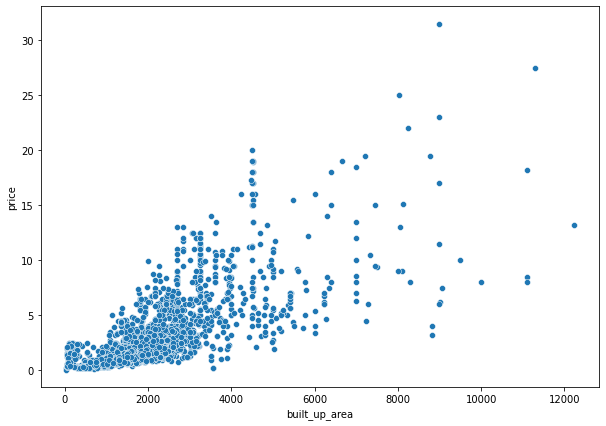

In [31]:
anomaly_df['built_up_area'] = anomaly_df['area']
df.update(anomaly_df)
sns.scatterplot(x=df['built_up_area'], y=df['price'])
plt.show()

In [32]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedrooms', 'bathrooms', 'balconies', 'floor_num',
       'facing', 'age_possession', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'study room', 'servant room', 'store room', 'pooja room',
       'others', 'furnishing_type', 'luxury_score', 'area_room_ratio'],
      dtype='object')

In [33]:
df.drop(columns=['area', 'areaWithType', 'super_built_up_area', 'carpet_area', 'area_room_ratio'], inplace=True)
df.head()

,property_type,society,sector,price,price_per_sqft,bedrooms,bathrooms,balconies,floor_num,facing,age_possession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,m3m heights,sector 65,2.50,13602.0,3.0,3.0,3,19.0,NaN,Undefined,1654.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0
1,flat,bestech park view city,sector 48,2.65,10323.0,4.0,4.0,3+,11.0,North-East,Moderately Old,2134.0,1.0,1.0,0.0,0.0,0.0,1.0,174.0
2,flat,ss the leaf,sector 85,1.20,7317.0,2.0,2.0,3,6.0,North,Relatively New,1300.0,0.0,0.0,0.0,0.0,0.0,1.0,174.0
3,flat,signature global solera,sector 107,0.52,8062.0,3.0,2.0,2,5.0,East,Relatively New,717.0,0.0,0.0,0.0,0.0,1.0,0.0,15.0
4,flat,signature global park,sohna road,0.54,7248.0,2.0,1.0,3,1.0,NaN,New Property,828.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0


In [34]:
df.isnull().sum()

property_type         0
society               0
sector                0
price                 0
price_per_sqft        0
bedrooms              0
bathrooms             0
balconies             0
floor_num            17
facing             1011
age_possession        0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [35]:
df[df['floor_num'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedrooms,bathrooms,balconies,floor_num,facing,age_possession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
213,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0.0,1.0,1.0,1.0,0.0,0.0,88.0
295,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
520,flat,independent,sector 78,0.60,3692.0,2.0,2.0,0,NaN,NaN,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
555,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,1,NaN,NaN,Relatively New,3240.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
1290,house,independent,sector 2,5.60,17284.0,8.0,6.0,3+,NaN,South-West,Moderately Old,3240.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1635,house,independent,sector 26,4.60,12198.0,4.0,4.0,3+,NaN,NaN,Old Property,3771.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
1730,house,independent,sector 24,1.45,2984.0,3.0,3.0,1,NaN,NaN,Old Property,60.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1870,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2166,house,independent,sector 25,13.00,45710.0,6.0,8.0,3+,NaN,NaN,Relatively New,2844.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0


In [39]:
med = df[df['property_type']=='house']['floor_num'].median()

In [40]:
df['floor_num'].fillna(med, inplace=True)
df.isnull().sum()

property_type         0
society               0
sector                0
price                 0
price_per_sqft        0
bedrooms              0
bathrooms             0
balconies             0
floor_num             0
facing             1011
age_possession        0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

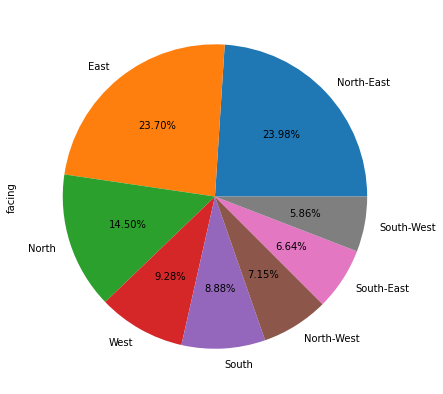

In [42]:
df['facing'].value_counts().plot(kind='pie', autopct='%0.2f%%')
plt.show()

In [43]:
df.drop(columns='facing', inplace=True)
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedrooms           0
bathrooms          0
balconies          0
floor_num          0
age_possession     0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [45]:
df['age_possession'].value_counts()

Relatively New        1605
Moderately Old         545
New Property           534
Undefined              454
Old Property           293
Under Construction     124
Name: age_possession, dtype: int64

In [46]:
df[df['age_possession']=='Undefined']

,property_type,society,sector,price,price_per_sqft,bedrooms,bathrooms,balconies,floor_num,age_possession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,m3m heights,sector 65,2.50,13602.0,3.0,3.0,3,19.0,Undefined,1654.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0
10,flat,godrej nature plus,sector 33,1.27,9183.0,2.0,2.0,3+,9.0,Undefined,1252.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0
20,flat,sare crescent parc,sector 92,1.00,4778.0,4.0,4.0,3,9.0,Undefined,2093.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,flat,raheja vanya,sector 99a,0.59,3976.0,2.0,2.0,3,1.0,Undefined,1133.0,0.0,0.0,0.0,0.0,1.0,0.0,96.0
51,flat,unitech south park,sector 70,1.13,7001.0,3.0,3.0,2,1.0,Undefined,1457.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3517,flat,m3m skywalk,sector 74,1.78,12500.0,2.0,2.0,3+,12.0,Undefined,1582.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0
3535,house,independent,sector 67,3.00,11905.0,4.0,4.0,0,3.0,Undefined,2800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3537,flat,m3m one key resiments,sector 67,0.80,13115.0,1.0,1.0,0,0.0,Undefined,610.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3542,flat,signature global city,sector 37d,1.25,6083.0,3.0,3.0,3,4.0,Undefined,2283.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0


In [47]:
def mode_imputation(row):
    if row['age_possession'] == 'Undefined':
        mode_val = df[(df['sector']==row['sector']) & (df['property_type']==row['property_type'])]['age_possession'].mode()
        if not mode_val.empty:
            return mode_val.iloc[0]
        else:
            return np.nan
    
    else:
        return row['age_possession']

In [48]:
df['age_possession'] = df.apply(mode_imputation, axis=1)

In [49]:
df['age_possession'].value_counts()

Relatively New        1792
Moderately Old         588
New Property           569
Old Property           331
Undefined              151
Under Construction     124
Name: age_possession, dtype: int64

In [50]:
def mode_imputation2(row):
    if row['age_possession'] == 'Undefined':
        mode_val = df[df['sector']==row['sector']]['age_possession'].mode()
        if not mode_val.empty:
            return mode_val.iloc[0]
        else:
            return np.nan
    
    else:
        return row['age_possession']

In [51]:
df['age_possession'] = df.apply(mode_imputation2, axis=1)
df['age_possession'].value_counts()

Relatively New        1808
Moderately Old         595
New Property           579
Old Property           342
Under Construction     124
Undefined              107
Name: age_possession, dtype: int64

In [52]:
def mode_imputation3(row):
    if row['age_possession'] == 'Undefined':
        mode_val = df[df['property_type']==row['property_type']]['age_possession'].mode()
        if not mode_val.empty:
            return mode_val.iloc[0]
        else:
            return np.nan
    
    else:
        return row['age_possession']

In [53]:
df['age_possession'] = df.apply(mode_imputation3, axis=1)
df['age_possession'].value_counts()

Relatively New        1889
Moderately Old         621
New Property           579
Old Property           342
Under Construction     124
Name: age_possession, dtype: int64

In [54]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedrooms           0
bathrooms          0
balconies          0
floor_num          0
age_possession     0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [55]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv', index=False)